# Importing necassary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Reading the dataset

In [2]:
df = pd.read_excel('/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


# Preprocessing & Cleaning

In [3]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [4]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


**This data is clean from NaN values, Nulls and duplicates**

In [7]:
# describing the numerical data
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [8]:
# describing the categorical data
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [9]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

In [10]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,June,Friday
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,June,Friday
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023,June,Friday
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023,June,Friday


In [11]:
# We can drop some columns we don't use in analysis
df.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [12]:
df

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2023-01-01,07:06:11,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2023-01-01,07:08:56,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,2023-01-01,07:14:04,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,2023-01-01,07:20:24,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,2023-01-01,07:22:41,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
149111,2023-06-30,20:18:41,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,June,Friday
149112,2023-06-30,20:25:10,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,June,Friday
149113,2023-06-30,20:31:34,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023,June,Friday
149114,2023-06-30,20:57:19,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino,2023,June,Friday


# Analysis & Visualization

In [13]:
df['year'].unique()

array([2023], dtype=int32)

In [14]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [15]:
transactions_per_month = df['month'].value_counts()
transactions_per_month

month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

In [16]:
iplot(px.bar(x=transactions_per_month.index, y=transactions_per_month.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Month', text_auto= True))

In [17]:
# # Same plot using seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values, color='skyblue', palette = "RdBu")
# plt.title('Transactions per Month')
# plt.xlabel('Month')
# plt.ylabel('Number of Transactions')
# plt.show()

In [18]:
df['day'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [19]:
transactions_per_day = df['day'].value_counts()
transactions_per_day

day
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

In [20]:
iplot(px.bar(x=transactions_per_day.index, y=transactions_per_day.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Day', text_auto= True))

In [21]:
# # Same plot using seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, color='skyblue', palette = "RdBu")
# plt.title('Transactions per Day')
# plt.xlabel('Month')
# plt.ylabel('Number of Transactions')
# plt.show()

In [22]:
# add new column hour 

df["hour"] = df["transaction_time"].apply(lambda x : x.hour)

In [23]:
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,7
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,7
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,7
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



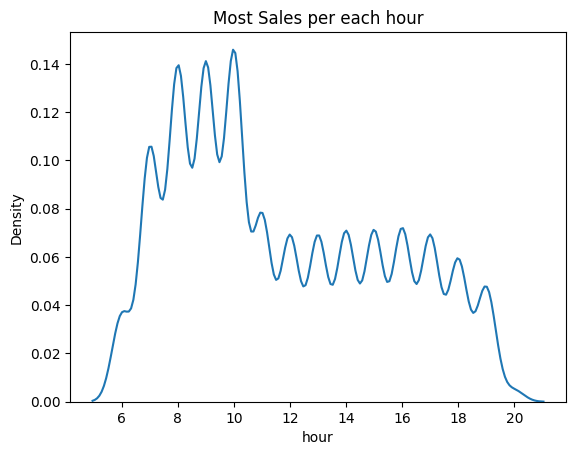

In [24]:
# see distribution

sns.kdeplot(df["hour"])
plt.title('Most Sales per each hour')
plt.show()

**This means that most of the transactions occurs from 8 am to 11 am**

In [25]:
df['transaction_qty'].unique()

array([2, 1, 3, 4, 8, 6])

In [26]:
no_sales_quantity = df['transaction_qty'].value_counts()
no_sales_quantity

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

In [27]:
iplot(px.bar(x=no_sales_quantity.index, y=no_sales_quantity.values,
             labels={'x': 'Quantity', 'y': 'Number of sales'},
             title='Number of sales quantity', text_auto= True))

In [28]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [29]:
sales_per_store = df['store_location'].value_counts()
sales_per_store

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [30]:
iplot(px.pie(names=sales_per_store.index, values=sales_per_store.values,
             title='Number of sales for each store'))

In [31]:
df["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

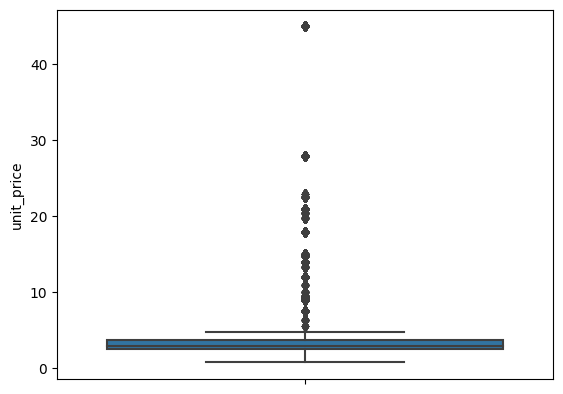

In [32]:
# see 5 number summary to check outliers

sns.boxplot(y = "unit_price", data = df)

**One might assume the presence of outliers, but such variations are expected in different types of coffee**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



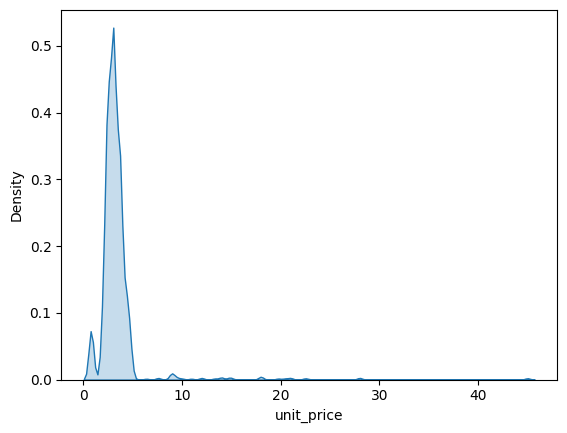

In [33]:
# see distribution

sns.kdeplot(x = df["unit_price"], fill = True)
plt.show()

**We can see: Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices**

In [34]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [35]:
category_count = df['product_category'].value_counts()
category_count

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [36]:
iplot(px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Product Category', 'y': 'Count'},
             title='Category Count', text_auto= True))

**We can see that Coffee stands as the best selling product. Also, Tea exhibits a high sales rates**

In [37]:
df["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [38]:
product_type_count = df['product_type'].value_counts()
product_type_count

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



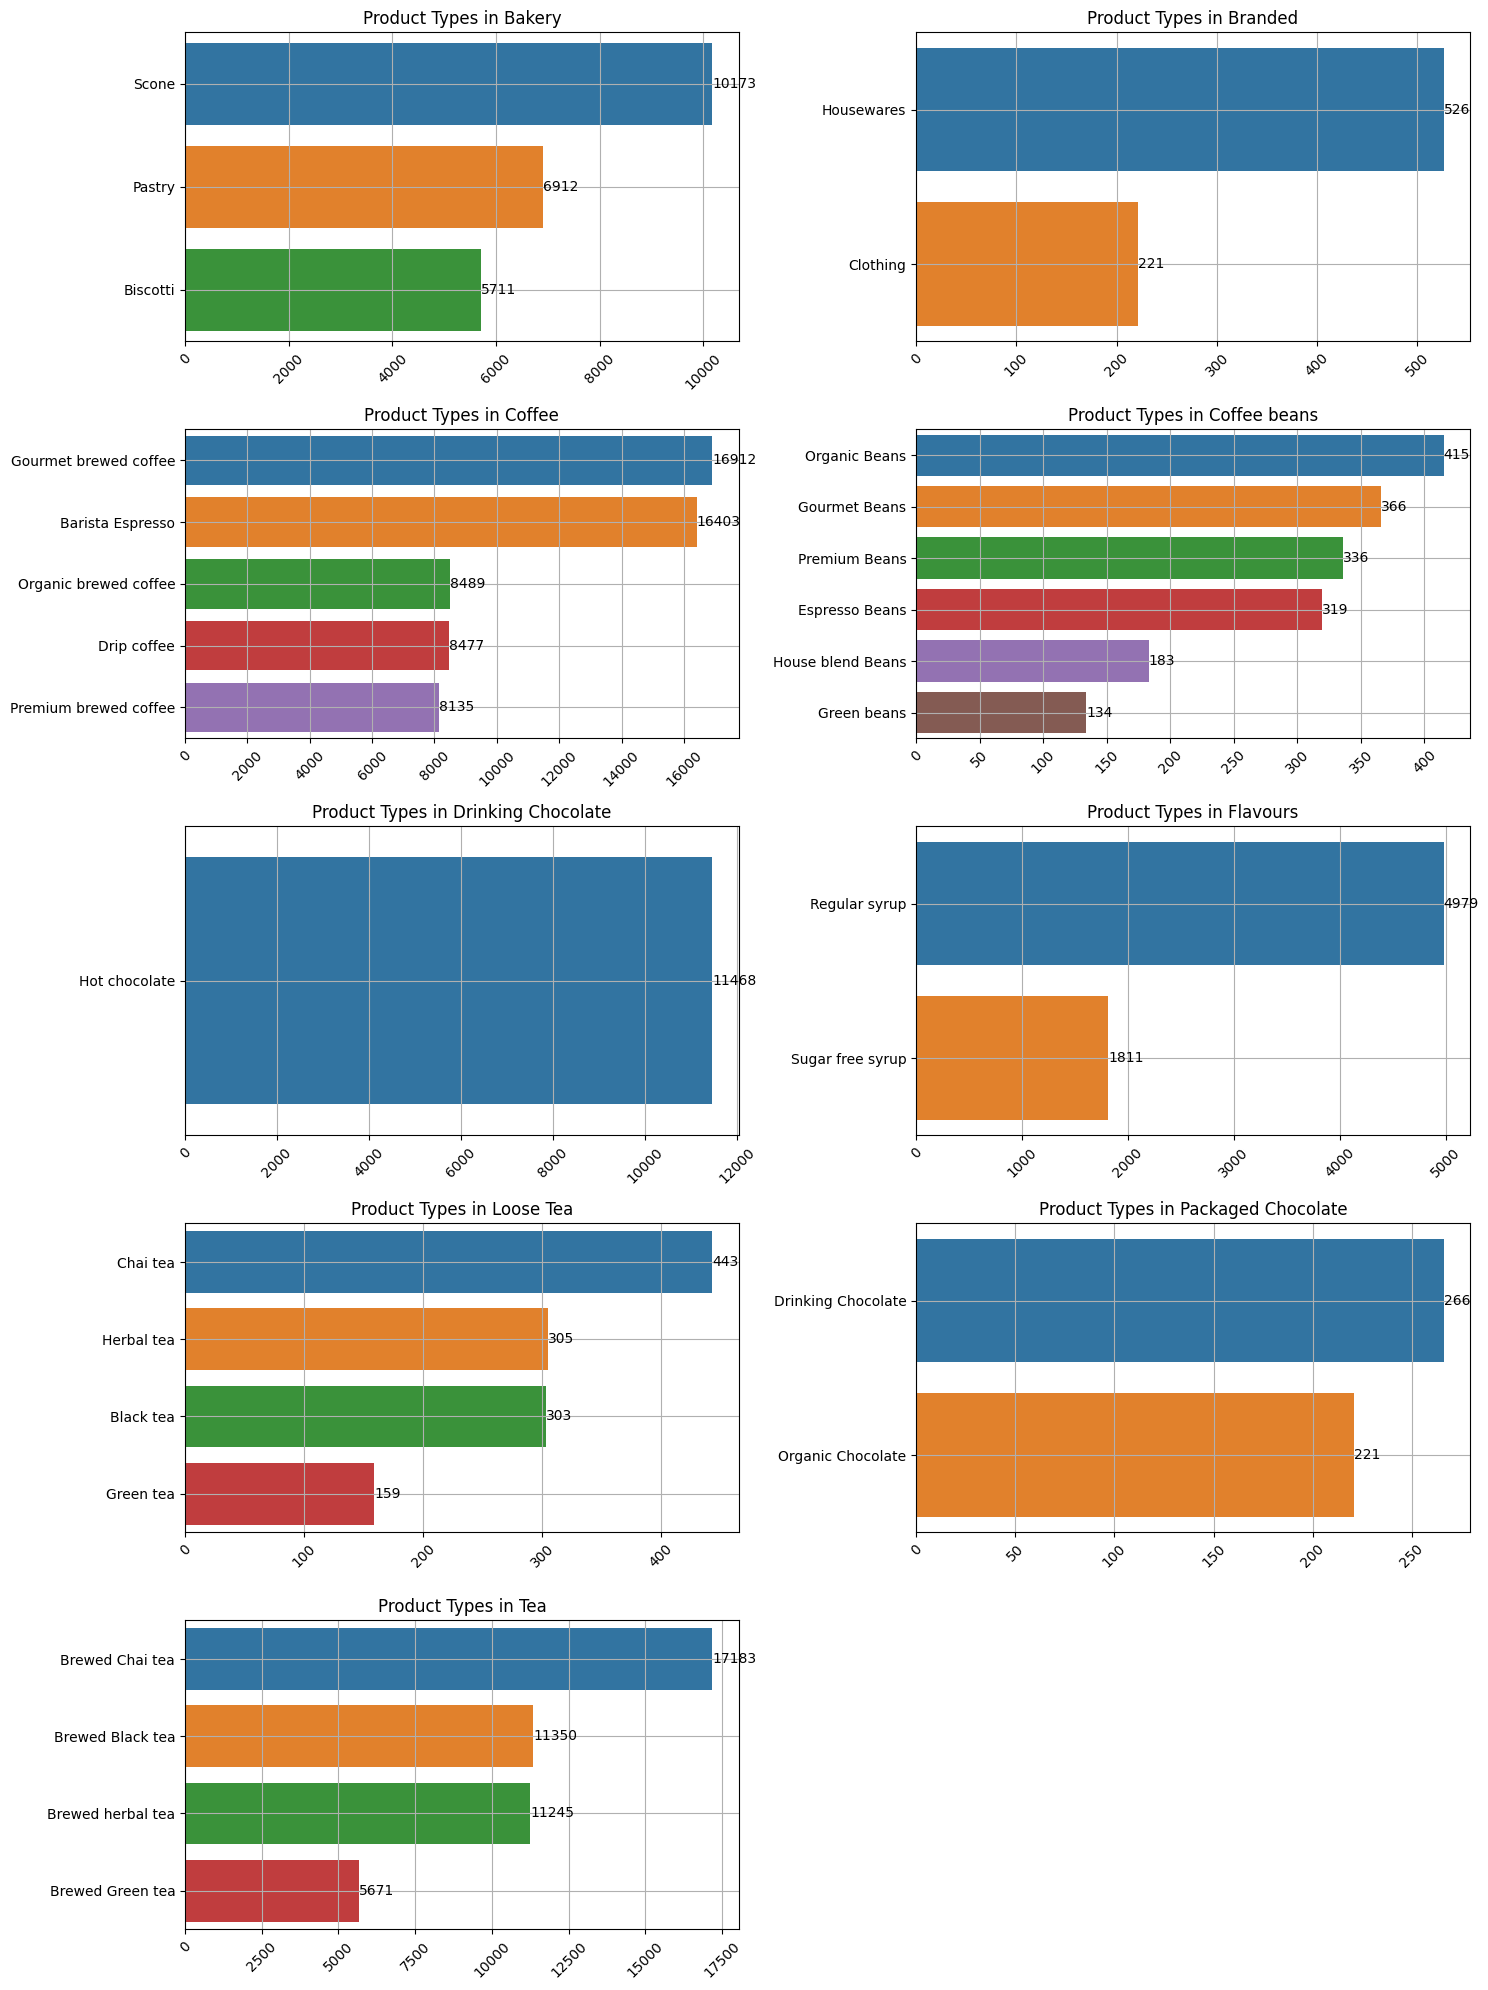

In [39]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Conclusion from Columns analysis

* **Year**, Sales exclusively from 2023.
* **Month**, Most sales within a six-month period
* **Hour**, Most sales were from 8 am to 11 pm
* **Transaction quantity**, Most sales were singles followed by 2 lots
* **Stores**, The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store
* **Unit price**, Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices
* **Category** :
  - it's evident that the three stores offer a wide range of services.
  - Coffee stands as the best-selling product.
  - Tea also exhibits a high sales rate.
* **product type** :
  - In the Bakery category, the most sold item is the scone
  - In the Branded category, the best-selling item is Housewares
  - In the Coffee category, the best-selling item is Gourmet brewed coffee
  - In the Coffee beans category, the best-selling item is Organic Beans
  - The Drinking Chocolate category solely offers hot chocolate
  - Regular syrup are the top-selling items in the Flavours category
  - In the Loose Tea category, the best-selling item is Chai tea
  - In the Packaged Chocolate category, the best-selling item is Drinking Chocolate
  - In the Tea category, the best-selling item is Brewed Chai tea

In [40]:
# add new column revenue
df["Total revenue"] = df["transaction_qty"] * df["unit_price"]

In [41]:
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour,Total revenue
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,7,6.0
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7,6.2
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,7,9.0
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,7,2.0
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7,6.2


In [42]:
# stores Vs transaction quantities

# Calculate sum of transaction quantities for each store_location
sum_transaction_qty = df.groupby("store_location")["transaction_qty"].sum().reset_index()

# Create a Plotly line plot
iplot(px.line(sum_transaction_qty, x="store_location", y="transaction_qty", 
              title="Total Transaction Quantities per Store Location",
              labels={"store_location": "Store Location", "transaction_qty": "Total Transaction Quantity"}))

**We can notice: The sales ratios for quantities seem to be quite similar across all stores**

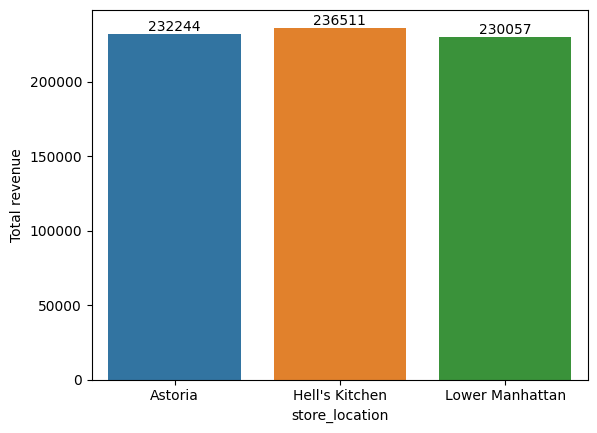

In [43]:
# Stores Vs Total revenue

# Calculate total revenue for each store_location
revenue = df.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

**Notes**: 
* The total revenue generated from sales at each store location amounted to  232,243.91 for Astoria,
 236,511.17 for Hell's Kitchen, and $230,057.25 for Lower Manhattan.
* "Hell's Kitchen" appears to be the best store in terms of revenue.

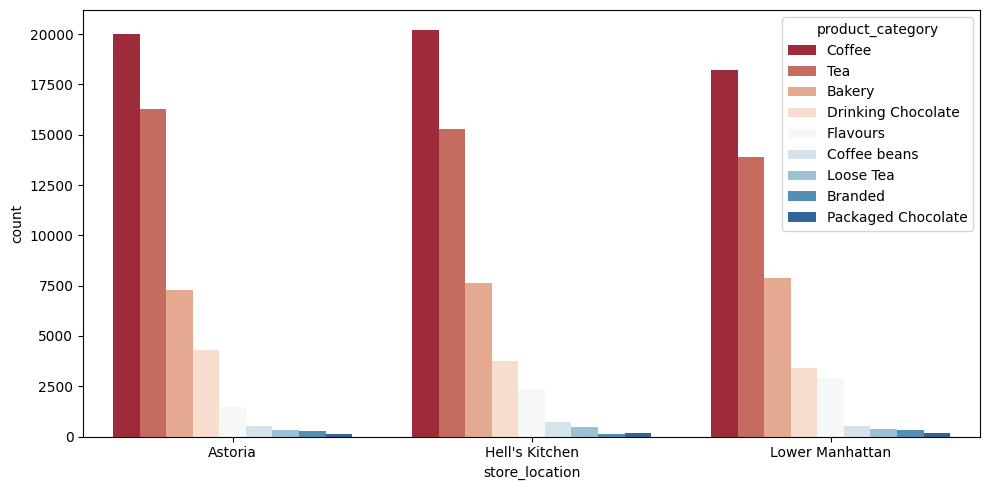

In [44]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

**Astoria Store** :
  - The highest selling product category is Coffee with a count of 20,025 units
  - Following Coffee, Tea stands as the second most popular category with a count of 16,260 units
  - Other categories like Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, and Packaged Chocolate have varying counts, ranging from 7289 to 110 units, in descending order
 

**Hell's Kitchen Store** :

  - Similar to Astoria, Coffee leads in sales, amounting to 20,187 units
  - Tea follows closely as the second most popular category with 15,277 units
  - Other categories, such as Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Packaged Chocolate, Branded, and Packaged Chocolate, have counts ranging from 7617 to 119 units
 

**Lower Manhattan Store** :

  - Coffee is again the top-selling category with 18,204 units
  - Tea follows with 13,912 units
  - Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate have counts ranging from 7890 to 180 units, in descending order

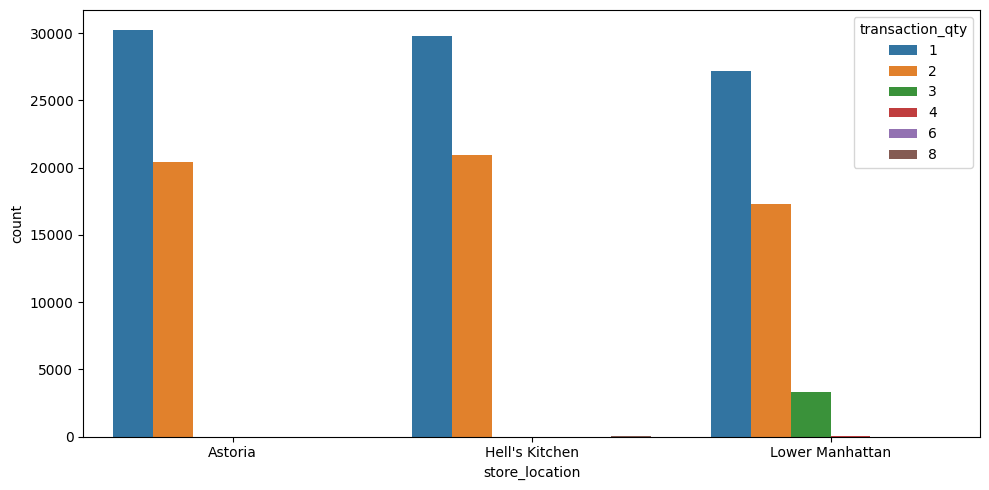

In [45]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = df.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

**Astoria Store** :
  - The most frequent transaction quantity observed is 1, with a count of 30,207 instances
  - The second most frequent transaction quantity is 2, noted 20,392 times
 

**Hell's Kitchen Store**:
  - The most frequent transaction quantity observed is 1, noted 29,793 times
  - The second most frequent transaction quantity is 2, observed 20,932 times
  - Additionally, there are 8 transactions with a quantity of 8
 

**Lower Manhattan Store**:
  - The most frequent transaction quantity observed is 1, recorded 27,159 times.
  - The second most frequent transaction quantity is 2, seen 17,318 times.
  - There are occurrences of transaction quantities 3, 4, and 6, but they are less frequent compared to quantities 1 and 2

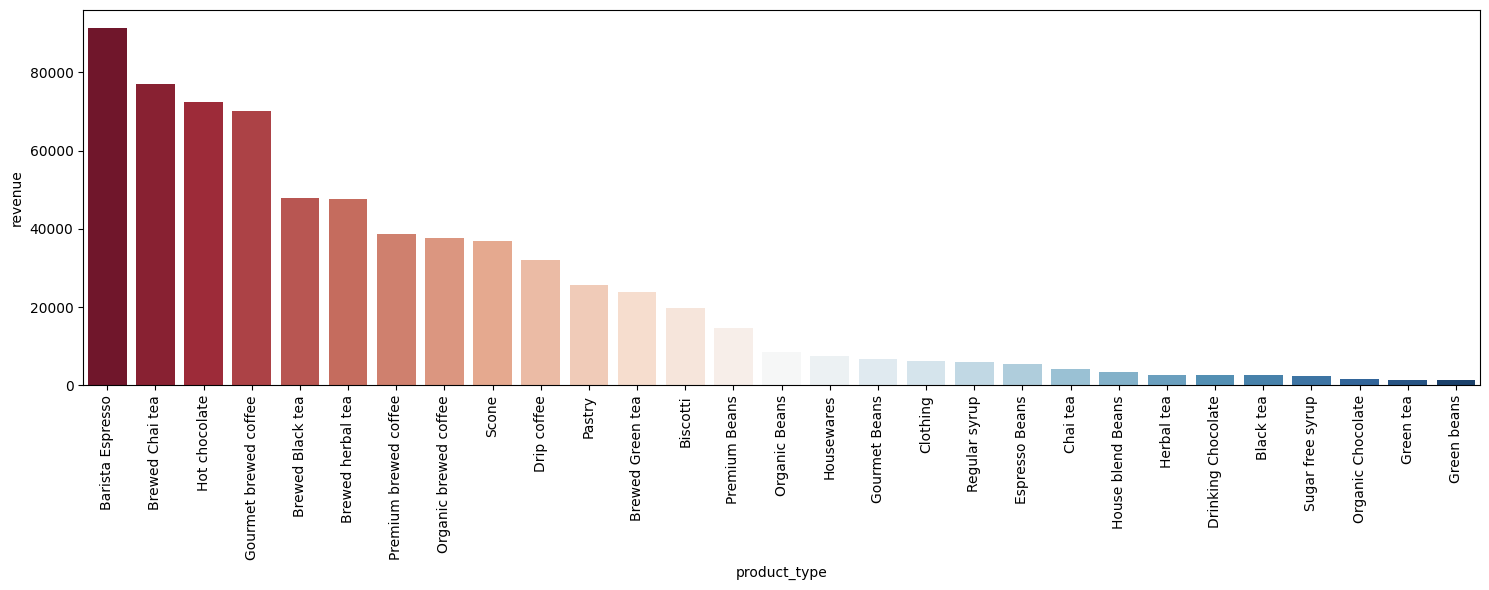

In [46]:
# grouped product_type' and 'Total revenue'
category_revenue = df.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Top Revenue Product Types** :
  - Barista Espresso with a revenue of 91,406.20
  - Brewed Chai tea with a revenue of 77,081.95
  - Hot chocolate with a revenue of 72,416.00
  - Gourmet brewed coffee with a revenue of 70,034.60
  - Brewed Black tea with a revenue of 47,932.00
 

**Lowest Revenue Product Types** :
  - Organic Chocolate with a revenue of 1,679.60
  - Green tea with a revenue of 1,470.75
  - Green beans with a revenue of 1,340.00
 

**Other Observations** :
  - Various products contribute to revenue across different ranges, with a mix of beverages (like teas, coffees) and snacks (biscotti, pastries).
  - Coffee-related products, such as various brews and espresso variants, hold prominent positions in revenue generation.
  - The lowest revenue-generating products are predominantly related to tea and specific beverage variants.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



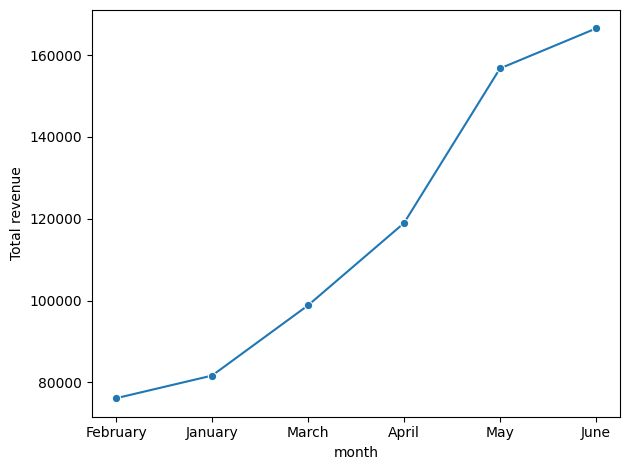

In [47]:
# Month VS revenue

# Grouping by month and summing the revenue
monthly_revenue  = df.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

**We can see** :
  - June had the highest total revenue, reaching 166,485.88, making it the most profitable month.
  - May followed closely behind with a total revenue of 156,727.76, indicating strong performance.
  - April and March also performed well, generating revenues of 118,941.08 and 98,834.68, respectively.
  - January and February had comparatively lower revenue figures at 81,677.74 and 76,145.19, respectively.